<a href="https://colab.research.google.com/github/joethecoolest/Stair-detect-PROJECT-/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_c%E1%BA%A7u_thang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
#from sklearn.preprocessing import OneHotEncode
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Stair Detection/Train')
labels = ['stair']
test_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Stair Detection/Test')
labels = ['stair']

In [ ]:
# checking the size of data available to us for training out model
for label in labels:
    directory1 = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory1)))

Images of label "stair":	 424


In [ ]:
for label in labels:
    directory2 = os.path.join(test_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory2)))

Images of label "stair":	 100


In [ ]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(300,300))

for i in range(1):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(1, 10, i*10 + j +1 )
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
  model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Stair Detection/Train', target_size=(384, 512), batch_size=32, class_mode='binary')
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Stair Detection/Test', target_size=(384, 512), batch_size=32, class_mode='binary')

Found 424 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [ ]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
14/14 [==============================] - 83s 5s/step - loss: 2.9599 - accuracy: 0.1250 - val_loss: 1.3284 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 24s 2s/step - loss: 2.4171 - accuracy: 0.1745 - val_loss: 0.8270 - val_accuracy: 0.4400
Epoch 3/50
14/14 [==============================] - 24s 2s/step - loss: 2.3152 - accuracy: 0.1722 - val_loss: 0.6501 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 24s 2s/step - loss: 2.2821 - accuracy: 0.1863 - val_loss: 0.4400 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 24s 2s/step - loss: 2.2769 - accuracy: 0.1840 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 24s 2s/step - loss: 2.2020 - accuracy: 0.1745 - val_loss: 6.1148e-04 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 24s 2s/step - loss: 2.1509 - accuracy: 0.2476 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 8/50
1

Sai số kiểm tra là:  0.8007318377494812
Độ chính xác kiểm tra là:  0.8899999856948853


<function matplotlib.pyplot.show>

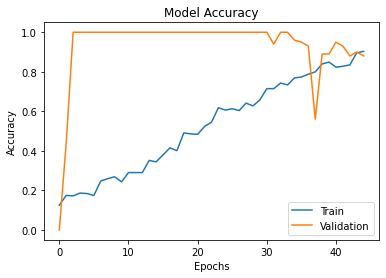

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
from keras.models import  load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Stair Detection/NhanDienCauThang.h5')
score = model.evaluate(validation_generator,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Stair Detection/NhanDienCauThang.h5')